# Breast Cancer Prediction - Exploratory Data Analysis

This notebook focuses on deeper exploratory data analysis of the Breast Cancer dataset.

The objective is to analyze distributions, outliers, and class-wise differences to gain insights that guide preprocessing and model selection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We load the locally stored dataset created in the previous notebook to ensure reproducibility.

In [2]:
df = pd.read_csv("../datasets/breast_cancer.csv")

X = df.drop("target", axis=1)
y = df["target"]

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Medical datasets often contain missing values.

We verify whether any missing or invalid entries exist.

In [3]:
df.isnull().sum().sum()

np.int64(0)

Boxplots help identify outliers and distribution spread across important features.

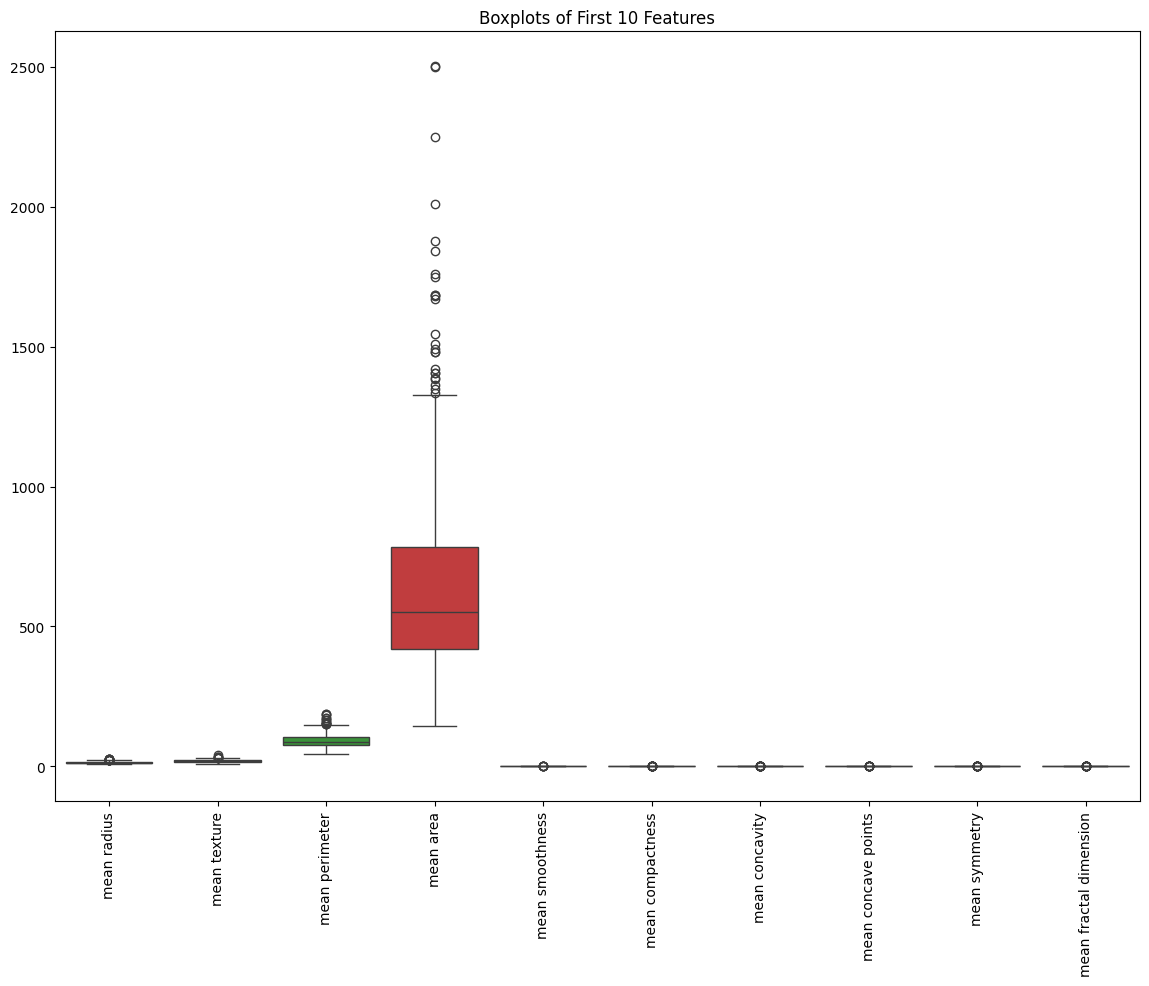

In [4]:
plt.figure(figsize=(14,10))
sns.boxplot(data=X.iloc[:, :10])
plt.xticks(rotation=90)
plt.title("Boxplots of First 10 Features")
plt.show()

We compare malignant and benign tumor distributions to observe how features differ across classes.

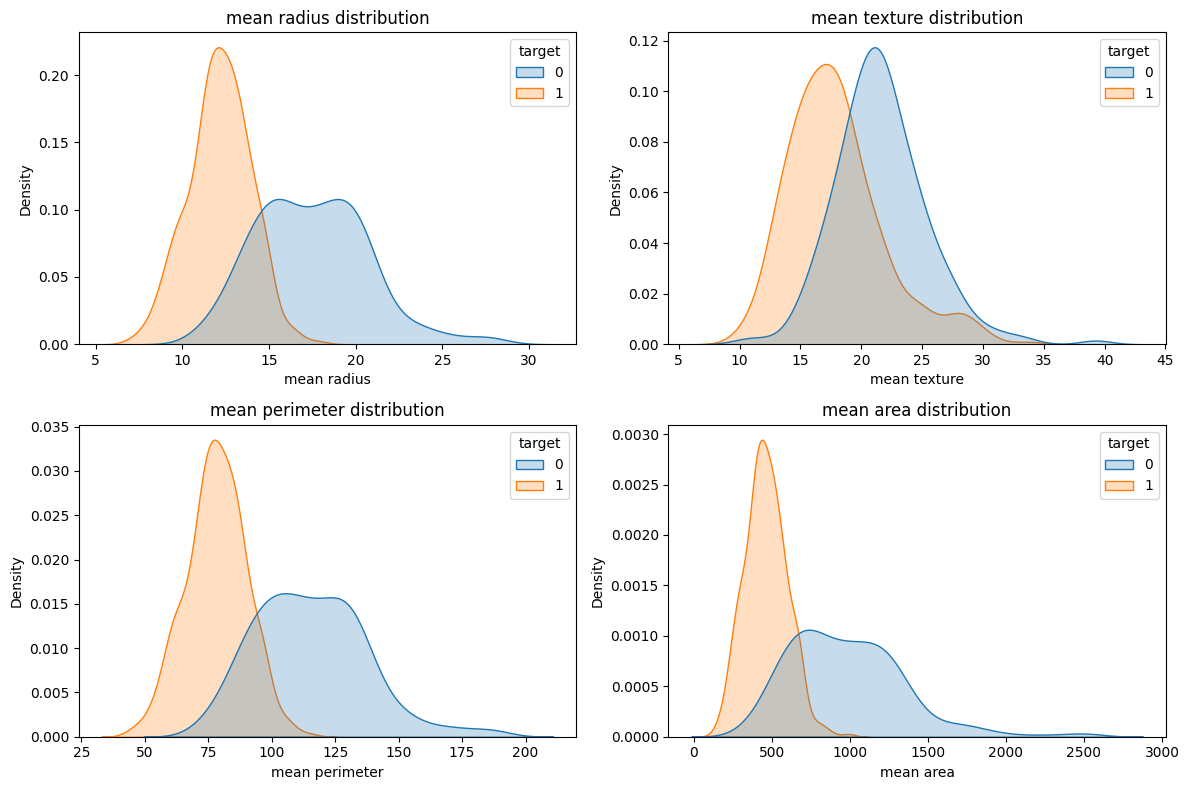

In [5]:
features = ["mean radius", "mean texture", "mean perimeter", "mean area"]

plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df, x=col, hue="target", fill=True, common_norm=False)
    plt.title(col + " distribution")
plt.tight_layout()
plt.show()

Pairwise feature relationships provide insight into separability and feature interaction patterns.

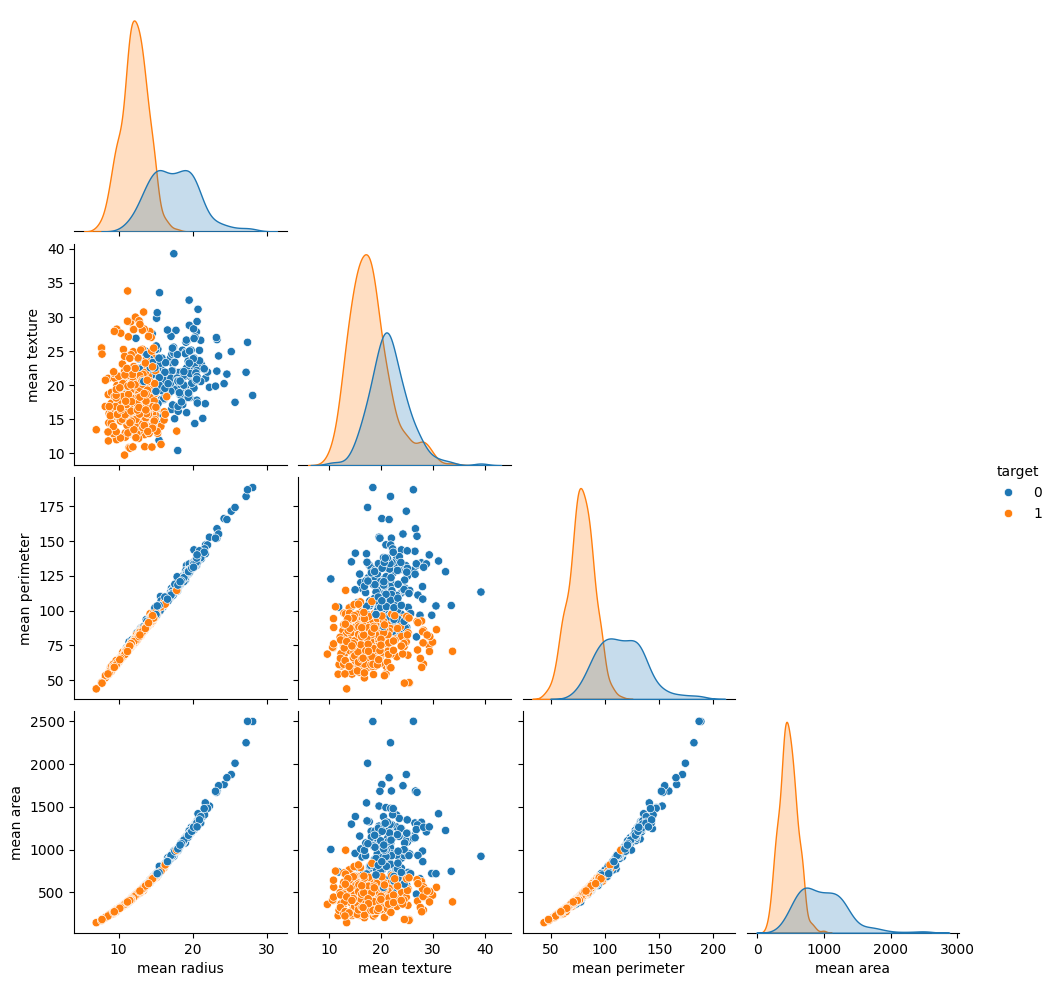

In [6]:
sample_cols = ["mean radius", "mean texture", "mean perimeter", "mean area", "target"]
sns.pairplot(df[sample_cols], hue="target", corner=True)
plt.show()